# Project: Writing a Data Scientists Blog Post

In this notebook I will be using sklearn and other ML learning libraries to analyse survey results.

# 1. Importing the data

In [1]:
import pandas as pd
import os
import glob
from collections import Counter
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
def load_year_from_csv(year):
    # defining the directory
    directory_path = os.path.join('..', 'data', 'stack-overflow-developer-survey-' + year)

    # Use glob to find all CSV files in the directory
    csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

    try:
        df = pd.read_csv(csv_files[0], sep=',', encoding='ISO-8859-1')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")

    return df

# creating a list of all the years we want to analise
years = ['2011',
        '2012',
        '2013',
        '2014',
        '2015',
        '2016',
        '2017',
        '2018',
        '2019',
        '2020',
        '2021',
        '2022',
        '2023',
        '2024']

data = []

for year in years:
    print('loading data for: ', year)
    data.append(load_year_from_csv(year));

loading data for:  2011
loading data for:  2012
loading data for:  2013
loading data for:  2014
loading data for:  2015
loading data for:  2016
loading data for:  2017
loading data for:  2018
loading data for:  2019
loading data for:  2020
loading data for:  2021
loading data for:  2022
loading data for:  2023
loading data for:  2024


In [8]:
# Verify that both lists have the same length
assert len(years) == len(data), "The lists must have the same length"

# Pair each string with its corresponding DataFrame
paired_list = zip(years, data)

# Convert the paired list to a dictionary
data_dict = dict(paired_list)

# 2. Identify Common Survey questions

In order to get an overview of the consistency of the survey over the years, we want to identify common questions and similarities over the years.

In [9]:
# Extract column names
column_names = {year: set(data.columns) for year, data in data_dict.items()}

In [10]:
# Find columns common to all DataFrames
common_columns = set.intersection(*column_names.values())

In [27]:
# Define the years for which you want to extract column names
selected_years = years[-7:-1]

# Extract column names for the selected years
all_columns_selected_years = []
for year in selected_years:
    if year in data_dict:
        all_columns_selected_years.extend(data_dict[year].columns)

# # Remove duplicates by converting the list to a set and back to a list
# all_columns_selected_years = list(set(all_columns_selected_years))

# Count the frequency of each column name
column_counter_selected_years = Counter(all_columns_selected_years)

# Print the column counts for verification
print(column_counter_selected_years)


Counter({'Country': 6, 'Employment': 6, 'DevType': 6, 'Age': 6, 'Gender': 5, 'MainBranch': 5, 'EdLevel': 5, 'OrgSize': 5, 'YearsCode': 5, 'YearsCodePro': 5, 'CompTotal': 5, 'SOVisitFreq': 5, 'SOAccount': 5, 'SOPartFreq': 5, 'SOComm': 5, 'SurveyLength': 5, 'SurveyEase': 5, 'Currency': 4, 'CompFreq': 4, 'Trans': 4, 'Sexuality': 4, 'Ethnicity': 4, 'NEWSOSites': 4, 'Respondent': 3, 'UndergradMajor': 3, 'CurrencySymbol': 3, 'LanguageWorkedWith': 3, 'LanguageDesireNextYear': 3, 'DatabaseWorkedWith': 3, 'DatabaseDesireNextYear': 3, 'PlatformWorkedWith': 3, 'PlatformDesireNextYear': 3, 'Age1stCode': 3, 'OpSys': 3, 'ResponseId': 3, 'LearnCode': 3, 'LanguageHaveWorkedWith': 3, 'LanguageWantToWorkWith': 3, 'DatabaseHaveWorkedWith': 3, 'DatabaseWantToWorkWith': 3, 'PlatformHaveWorkedWith': 3, 'PlatformWantToWorkWith': 3, 'WebframeHaveWorkedWith': 3, 'WebframeWantToWorkWith': 3, 'MiscTechHaveWorkedWith': 3, 'MiscTechWantToWorkWith': 3, 'ToolsTechHaveWorkedWith': 3, 'ToolsTechWantToWorkWith': 3, 'NE

<BarContainer object of 294 artists>

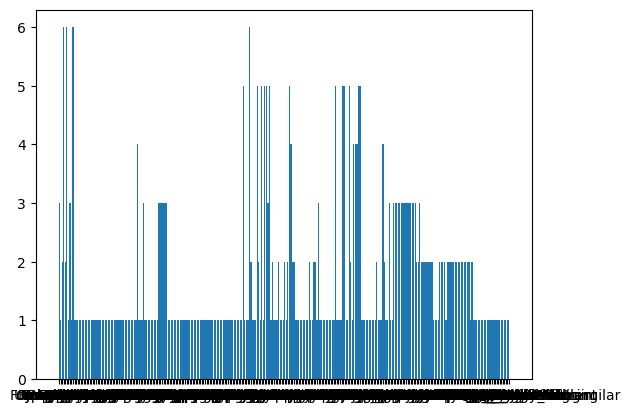

In [28]:
plt.bar(column_counter_selected_years.keys(), column_counter_selected_years.values())

<Axes: ylabel='Count'>

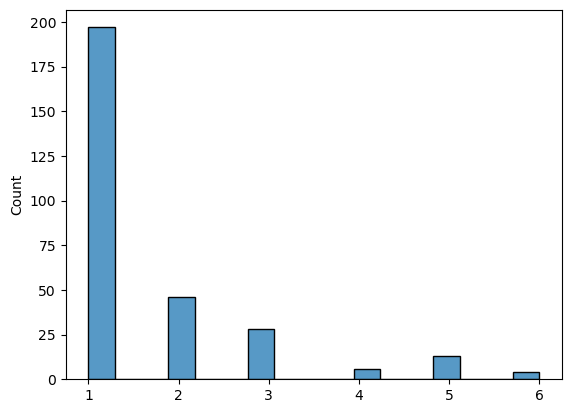

In [29]:
sns.histplot(column_counter_selected_years)

In [30]:
all_columns_selected_years.count('Country')

6

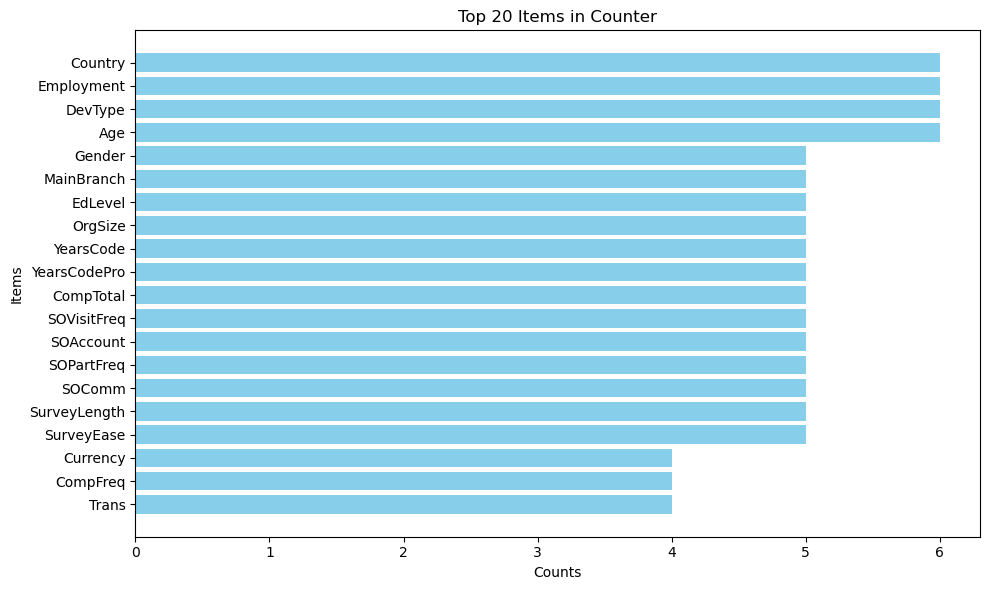

In [31]:
# Select the 20 most common columns between the years of the survey
top_20_columns = column_counter_selected_years.most_common(20)

# Separate keys and values for plotting
labels, values = zip(*top_20_columns)

# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Items')
plt.title('Top 20 Items in Counter')
plt.gca().invert_yaxis()  # Invert y-axis to show the largest count at the top
plt.tight_layout()
plt.show()